## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.



### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).


### Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.
But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Fill missing values with zeros.
* Apply the log transform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.


## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity`
* `total_rooms`
* `latitude`
* `population`


## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.045
* 0.245
* 0.545
* 0.845


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for retrieving the answer.

- 10
- 25
- 50
- 160


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25


# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `total_rooms`
* `median_income`
* `total_bedrooms`
* `longitude`


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value



## Submit the results

- Submit your results here: https://forms.gle/Qa2SuzG7QGZNCaoV9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is October 23 (Monday), 23:00 CET. After that the form will be closed.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [8]:
# Preparing the dataset 

df = pd.read_csv('../housing.csv')

df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

df = df.fillna(0)
df['median_house_value'] = np.log(df['median_house_value'])

# df['median_house_value'].hist(bins=150)

X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

X_train_, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, test_size=0.25, random_state=1)

dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(X_train.to_dict(orient='records'))
X_val = dv.transform(X_val.to_dict(orient='records'))
X_test = dv.transform(X_test.to_dict(orient='records'))

R^2: 0.35369075378267556


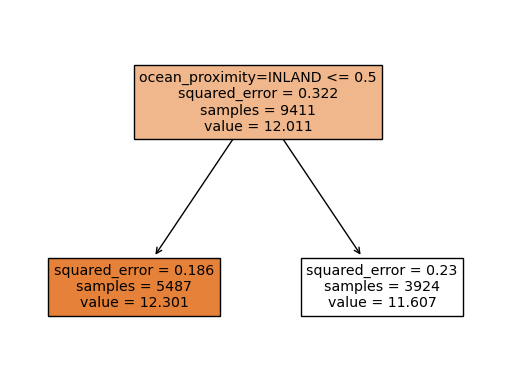

In [19]:
## Question 1

# Which feature is used for splitting the data?

# * `ocean_proximity`

tree_reg = DecisionTreeRegressor(max_depth=1)
tree_reg.fit(X_train, y_train)
print('R^2:',  tree_reg.score(X_val, y_val))

# plot the decision tree
plot_tree(tree_reg, filled=True, feature_names=dv.feature_names_);


In [21]:
## Question 2

# What's the RMSE of this model on validation?

# * 0.245


rf_reg = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

rf_reg.fit(X_train, y_train)
# rmse
y_pred = rf_reg.predict(X_val)
print('RMSE:', mean_squared_error(y_val, y_pred, squared=False))

RMSE: 0.24543642958692266


In [22]:
## Question 3

# Now let's experiment with the `n_estimators` parameter

# * Try different values of this parameter from 10 to 200 with step 10.

# After which value of `n_estimators` does RMSE stop improving?
# Consider 3 decimal places for retrieving the answer.

# - 160

for n_estimators in range(10, 201, 10):
    rf_reg = RandomForestRegressor(n_estimators=n_estimators, random_state=1, n_jobs=-1)
    rf_reg.fit(X_train, y_train)
    y_pred = rf_reg.predict(X_val)
    print(n_estimators, mean_squared_error(y_val, y_pred, squared=False))

10 0.2454364295869227
20 0.23864199163579308
30 0.2373274532653095
40 0.235834139278476
50 0.23565647119635627
60 0.23528222212209632
70 0.23488203321286513
80 0.2348796527897294
90 0.23462486831034618
100 0.2345159686137409
110 0.2344202940110276
120 0.23422033674947323
130 0.23401871422268994
140 0.23368585114693088
150 0.23348224851968832
160 0.23337793887482924
170 0.2333272742529523
180 0.23348967559264372
190 0.23370008988274746
200 0.23360432342980147


In [23]:
## Question 4

# What's the best `max_depth`, using the mean RMSE?

# * 20

best_max_depth = None

for max_depth in [10, 15, 20, 25]:
    print('max_depth:', max_depth)
    rmse_list = []
    for n_estimators in range(10, 201, 10):
        rf_reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=1, n_jobs=-1)
        rf_reg.fit(X_train, y_train)
        y_pred = rf_reg.predict(X_val)
        rmse_list.append(mean_squared_error(y_val, y_pred, squared=False))
        # print(n_estimators, mean_squared_error(y_val, y_pred, squared=False))
    mean_rmse = np.mean(rmse_list)
    print('Mean RMSE:', mean_rmse)
    
    if best_max_depth is None or mean_rmse < best_max_depth[1]:
        best_max_depth = (max_depth, mean_rmse)


max_depth: 10
Mean RMSE: 0.2452420330110688
max_depth: 15
Mean RMSE: 0.23598567527123654
max_depth: 20
Mean RMSE: 0.23478946459463262
max_depth: 25
Mean RMSE: 0.23504134185896763


In [24]:
print('Best max_depth:', best_max_depth)

Best max_depth: (20, 0.23478946459463262)


In [30]:
# Question 5

# What's the most important feature (among these 4)? 

# * `median_income`


rf_reg_fi = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf_reg_fi.fit(X_train, y_train)

feature_importances = rf_reg_fi.feature_importances_
for feature_name, score in sorted(zip(dv.feature_names_, feature_importances), key=lambda x: x[1], reverse=True):
    print(f'{feature_name:30s} {score:.6f}')

ocean_proximity=INLAND         0.366280
median_income                  0.335320
latitude                       0.101279
longitude                      0.086834
housing_median_age             0.030134
population                     0.027851
total_rooms                    0.021493
total_bedrooms                 0.015466
households                     0.015343
ocean_proximity=<1H OCEAN      0.000000


In [36]:

## Question 6

# Now change `eta` from `0.3` to `0.1`.

# Which eta leads to the best RMSE score on the validation dataset?

# * 0.3

train_DMatrix = xgb.DMatrix(X_train, label=y_train)
val_DMatrix = xgb.DMatrix(X_val, label=y_val)

watchlist = [(train_DMatrix, 'train'), (val_DMatrix, 'val')]

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, train_DMatrix, num_boost_round=100, verbose_eval=10, evals=watchlist)
y_pred = xgb_model.predict(val_DMatrix)
print('Eta = 0.3')
print('RMSE:', mean_squared_error(y_val, y_pred, squared=False))

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, train_DMatrix, num_boost_round=100, verbose_eval=10, evals=watchlist)
y_pred = xgb_model.predict(val_DMatrix)
print('Eta = 0.1')
print('RMSE:', mean_squared_error(y_val, y_pred, squared=False))


[0]	train-rmse:0.44351	val-rmse:0.44250


[10]	train-rmse:0.21445	val-rmse:0.25179
[20]	train-rmse:0.18524	val-rmse:0.23978
[30]	train-rmse:0.16888	val-rmse:0.23571
[40]	train-rmse:0.15542	val-rmse:0.23319
[50]	train-rmse:0.14536	val-rmse:0.23225
[60]	train-rmse:0.13719	val-rmse:0.23139
[70]	train-rmse:0.12943	val-rmse:0.23068
[80]	train-rmse:0.12192	val-rmse:0.22886
[90]	train-rmse:0.11504	val-rmse:0.22877
[99]	train-rmse:0.11043	val-rmse:0.22873
Eta = 0.3
RMSE: 0.22873152041427697
[0]	train-rmse:0.52449	val-rmse:0.52045
[10]	train-rmse:0.30326	val-rmse:0.31427
[20]	train-rmse:0.24512	val-rmse:0.26882
[30]	train-rmse:0.21887	val-rmse:0.25267
[40]	train-rmse:0.20392	val-rmse:0.24539
[50]	train-rmse:0.19215	val-rmse:0.24020
[60]	train-rmse:0.18457	val-rmse:0.23791
[70]	train-rmse:0.17741	val-rmse:0.23622
[80]	train-rmse:0.17242	val-rmse:0.23454
[90]	train-rmse:0.16798	val-rmse:0.23332
[99]	train-rmse:0.16323	val-rmse:0.23209
Eta = 0.1
RMSE: 0.23209114290057498
